In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('description.csv',encoding='latin-1')
df

,book_id,name,description
0,4833.0,The Glass Castle,"A tender, moving tale of unconditional love in..."
1,590.0,"Night (The Night Trilogy, #1)","Born into a Jewish ghetto in Hungary, as a chi..."
2,4264.0,"Angela's Ashes (Frank McCourt, #1)",Imbued on every page with Frank McCourt's asto...
3,3361.0,"Eat, Pray, Love","A celebrated writer's irresistible, candid, an..."
4,4535.0,Into Thin Air: A Personal Account of the Mount...,A bank of clouds was assembling on the not-so-...
...,...,...,...
138,3549.0,The Scientist as Rebel (New York Review Books),"From Galileo to todays amateur astronomers, s..."
139,2307.0,The Life and Love of Dogs,"Once you have had a wonderful dog, a life with..."
140,690.0,Fish Tales: Stories & Recipes from Sustainable...,From the wild salmon caught in the Yukon river...
141,3329.0,Health: The Basics (11th Edition),This Edition of Donatelles text provides stud...


In [16]:
df.fillna(method='ffill',inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   book_id      143 non-null    float64
 1   name         143 non-null    object 
 2   description  143 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.5+ KB


In [23]:
docs=df.iloc[:140,-1].values

In [25]:
docs

array(['A tender, moving tale of unconditional love in a family that, despite its profound flaws, gave the author the fiery determination to carve out a successful life on her own terms.\nJeannette Walls grew up with parents whose ideals and stubborn nonconformity were both their curse and their salvation. Rex and Rose Mary Walls had four children. In the beginning, they lived like nomads, moving among Southwest desert towns, camping in the mountains. Rex was a charismatic, brilliant man who, when sober, captured his children\'s imagination, teaching them physics, geology, and above all, how to embrace life fearlessly. Rose Mary, who painted and wrote and couldn\'t stand the responsibility of providing for her family, called herself an "excitement addict." Cooking a meal that would be consumed in fifteen minutes had no appeal when she could make a painting that might last forever. \nLater, when the money ran out, or the romance of the wandering life faded, the Walls retreated to the di

In [26]:
string_list =list(docs)

for i in range(len(string_list)):
    string_list[i] = string_list[i].lower()


print(string_list)

['a tender, moving tale of unconditional love in a family that, despite its profound flaws, gave the author the fiery determination to carve out a successful life on her own terms.\njeannette walls grew up with parents whose ideals and stubborn nonconformity were both their curse and their salvation. rex and rose mary walls had four children. in the beginning, they lived like nomads, moving among southwest desert towns, camping in the mountains. rex was a charismatic, brilliant man who, when sober, captured his children\'s imagination, teaching them physics, geology, and above all, how to embrace life fearlessly. rose mary, who painted and wrote and couldn\'t stand the responsibility of providing for her family, called herself an "excitement addict." cooking a meal that would be consumed in fifteen minutes had no appeal when she could make a painting that might last forever. \nlater, when the money ran out, or the romance of the wandering life faded, the walls retreated to the dismal w

In [72]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(string_list)
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=7, n_init=1)

C:\Users\user\anaconda3\envs\virtualTiwa\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


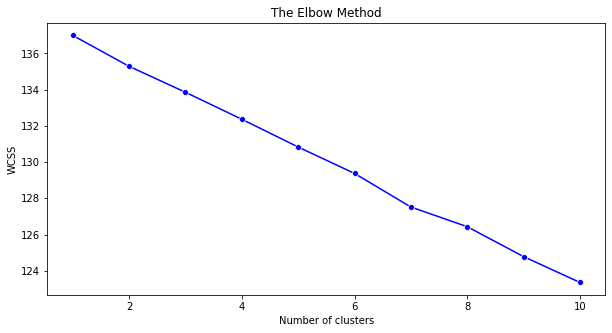

In [73]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

Top terms per cluster:


In [75]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print("\n")


Cluster 0:
 marketing
 jesus
 managing
 building
 greatest
 thoughts
 team
 photos
 charlie
 text


Cluster 1:
 studies
 museum
 commerce
 cultural
 gandhi
 contemporary
 political
 blake
 century
 history


Cluster 2:
 freddy
 tracks
 fair
 colorado
 grade
 town
 science
 understanding
 parents
 children


Cluster 3:
 potato
 book
 techniques
 biology
 cnidarians
 popular
 animals
 contains
 details
 group


Cluster 4:
 story
 bodies
 children
 war
 child
 does
 parts
 surgery
 mother
 years


Cluster 5:
 wedding
 new
 life
 gardens
 money
 planning
 english
 ll
 tips
 book


Cluster 6:
 readers
 health
 day
 paddling
 leslie
 program
 fitness
 faith
 phonics
 physical




In [52]:
# testing the model

Y = vectorizer.transform([df.iloc[142,-1]])
prediction = model.predict(Y)
print(prediction)


[5]


In [64]:
accuracy=adjusted_rand_score()
accuracy

ValueError: labels_true must be 1D: shape is (140, 4128)